# Import necessary libraries

In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Load the dataset

In [146]:
datasetreader = pd.read_csv('avocado_clean.csv')
datasetreader.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,type_encoded,region_encoded
0,9126,1451174400000000000,1.83,989.55,8.16,88.59,0.0,892.80,892.80,0.00,0.0,2015,1,0
1,9127,1450569600000000000,1.89,1163.03,30.24,172.14,0.0,960.65,960.65,0.00,0.0,2015,1,0
2,9128,1449964800000000000,1.85,995.96,10.44,178.70,0.0,806.82,806.82,0.00,0.0,2015,1,0
3,9129,1449360000000000000,1.84,1158.42,90.29,104.18,0.0,963.95,948.52,15.43,0.0,2015,1,0
4,9130,1448755200000000000,1.94,831.69,0.00,94.73,0.0,736.96,736.96,0.00,0.0,2015,1,0


# Dropping Unnecessary Columns - "region_encoded"

In [147]:
datasetreader = datasetreader.drop(columns = ['region_encoded', 'Unnamed: 0'])
datasetreader.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,type_encoded
0,1451174400000000000,1.83,989.55,8.16,88.59,0.0,892.80,892.80,0.00,0.0,2015,1
1,1450569600000000000,1.89,1163.03,30.24,172.14,0.0,960.65,960.65,0.00,0.0,2015,1
2,1449964800000000000,1.85,995.96,10.44,178.70,0.0,806.82,806.82,0.00,0.0,2015,1
3,1449360000000000000,1.84,1158.42,90.29,104.18,0.0,963.95,948.52,15.43,0.0,2015,1
4,1448755200000000000,1.94,831.69,0.00,94.73,0.0,736.96,736.96,0.00,0.0,2015,1


# Splitting The Dataset

In [148]:
X = datasetreader.drop(columns = ['AveragePrice'])
y = datasetreader['AveragePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Correlation Matrix

In [149]:
columns = ['Date', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'type_encoded']

correlation_matrix = datasetreader.corr()

print("Correlation Matrix:")
print(correlation_matrix)

correlation_scores = []
positive = []
negative = []

for column in columns:
    independent_variable = column
    dependent_variable = 'AveragePrice'
    correlation = correlation_matrix.loc[dependent_variable, independent_variable]  # Corrected access to correlation value
    correlation_scores.append(correlation)
    if correlation > 0:  # Corrected logic for positive correlation
        positive.append(columns.index(column))
    else:
        negative.append(columns.index(column))

    direction = "positive" if correlation > 0 else "negative" if correlation < 0 else "no"  # Simplified direction determination
    print(f"The correlation between {column} and Average Price is {correlation:.2f}, indicating a {direction} relationship.")

# No need to filter positively and negatively correlated attributes again as it's already done above

print('\nPositively Correlated attributes with Price:')
for col in positive:  # Iterate over positive indices
    score = correlation_matrix.loc['AveragePrice', columns[col]]  # Access correlation score using the index
    print(columns[col], " - ", round(score, 6))

print('\nNegatively Correlated attributes with Price:')
for col in negative:  # Iterate over negative indices
    score = correlation_matrix.loc['AveragePrice', columns[col]]  # Access correlation score using the index
    print(columns[col], " - ", round(score, 6))


Correlation Matrix:
                  Date  AveragePrice  Total Volume      4046      4225  \
Date          1.000000      0.051768     -0.018240 -0.190207 -0.120194   
AveragePrice  0.051768      1.000000     -0.070402 -0.129632  0.075284   
Total Volume -0.018240     -0.070402      1.000000  0.752876  0.799953   
4046         -0.190207     -0.129632      0.752876  1.000000  0.366439   
4225         -0.120194      0.075284      0.799953  0.366439  1.000000   
4770         -0.140099      0.096519      0.042710  0.004498  0.029331   
Total Bags    0.407813     -0.158900      0.523023  0.212702  0.129057   
Small Bags    0.383273     -0.095937      0.511314  0.225651  0.114697   
Large Bags    0.131158     -0.279201      0.083794 -0.041569  0.069668   
XLarge Bags        NaN           NaN           NaN       NaN       NaN   
year          0.950976     -0.000423     -0.000588 -0.166673 -0.108413   
type_encoded       NaN           NaN           NaN       NaN       NaN   

                 

# Scatterplots

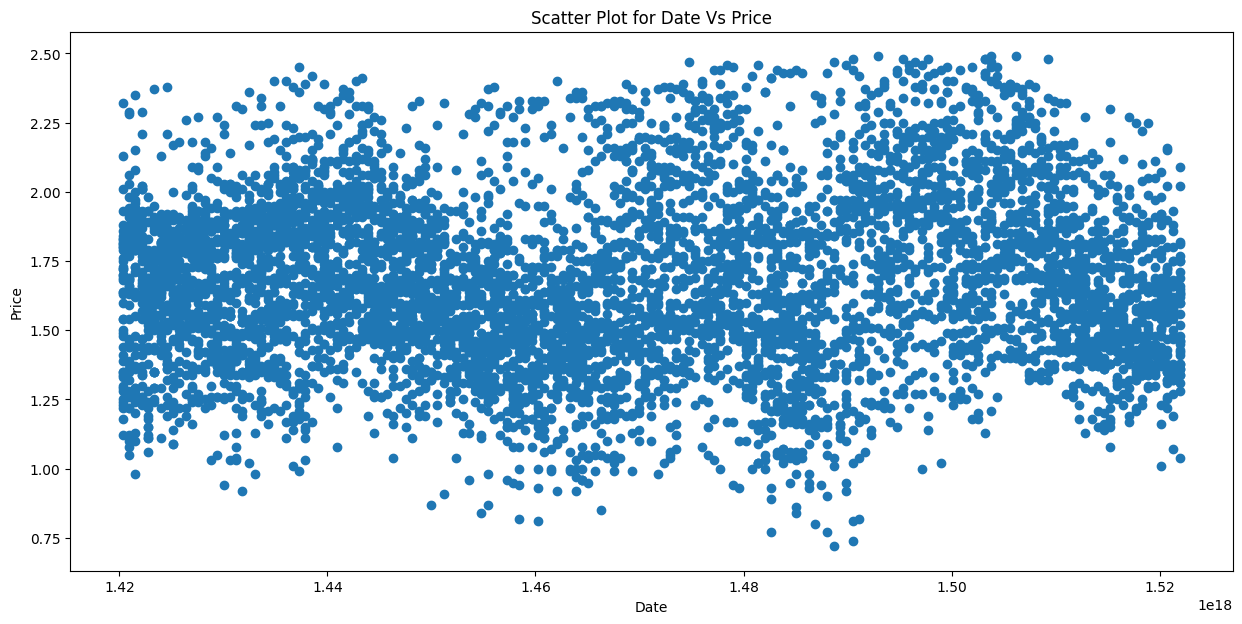

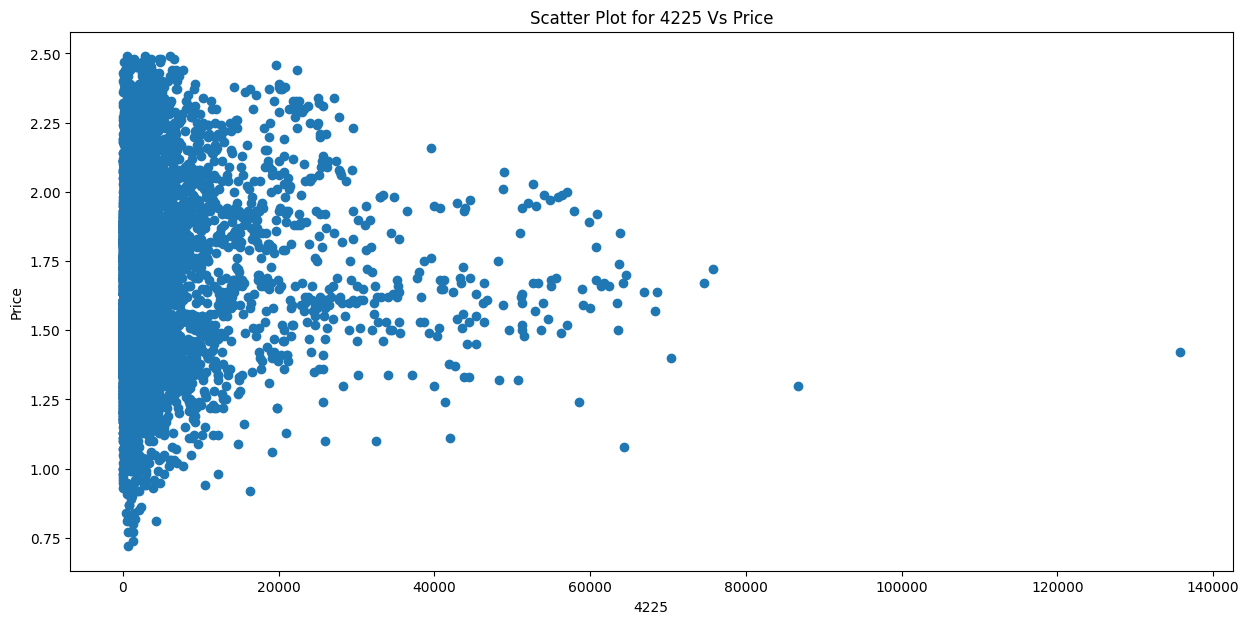

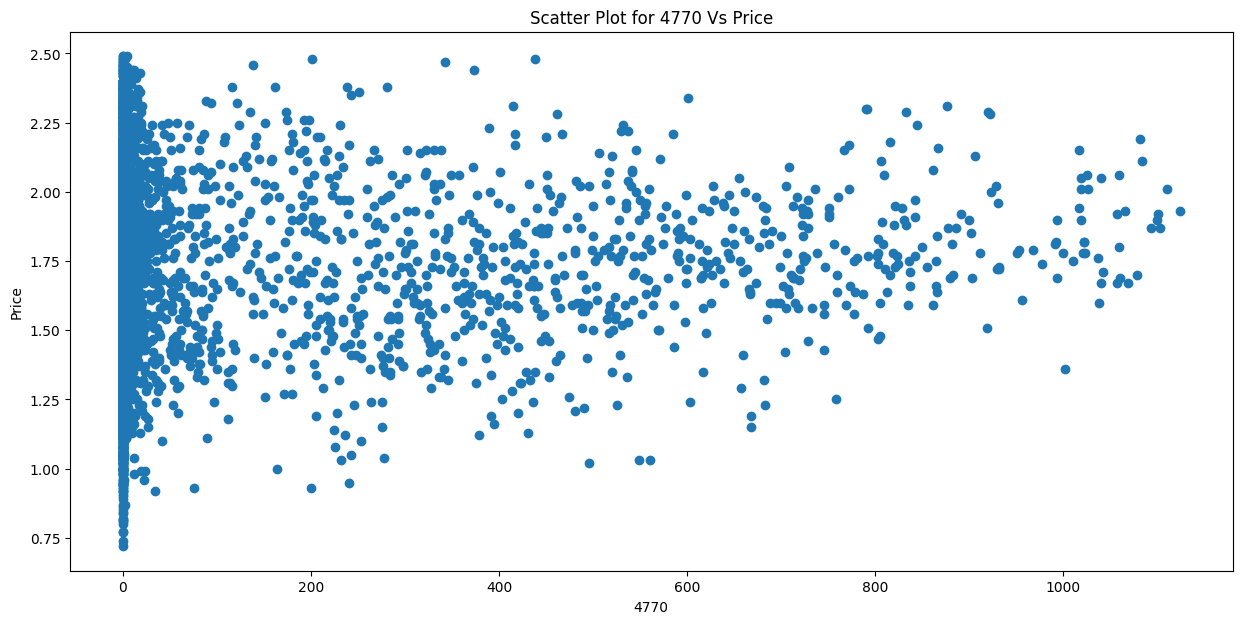

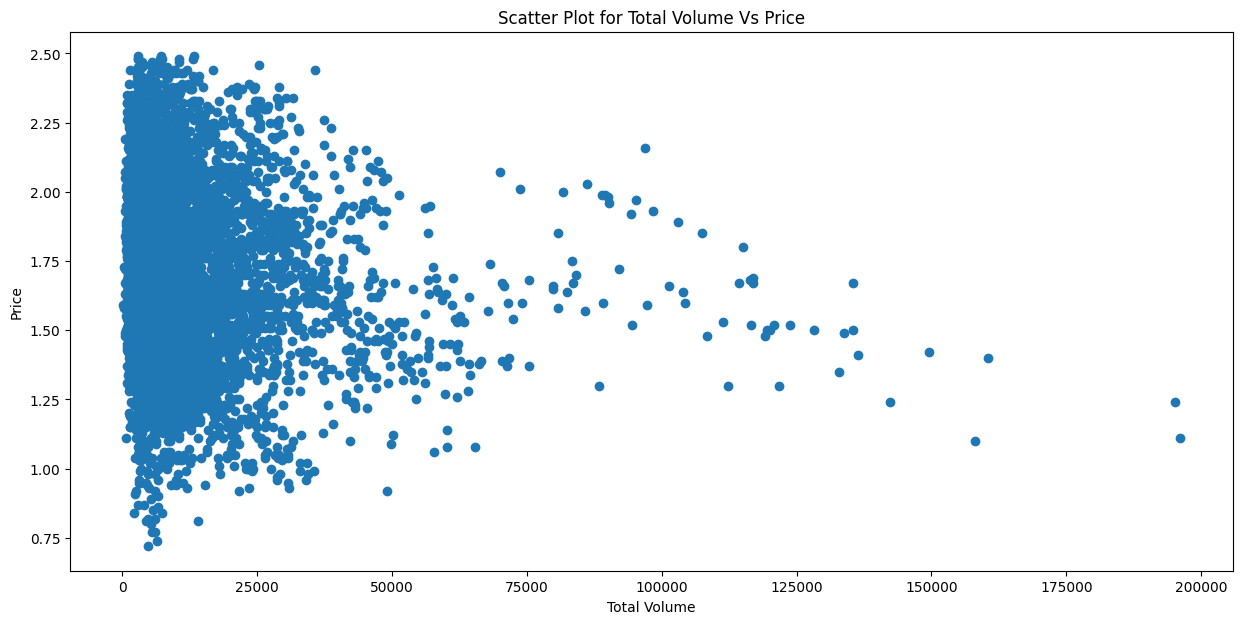

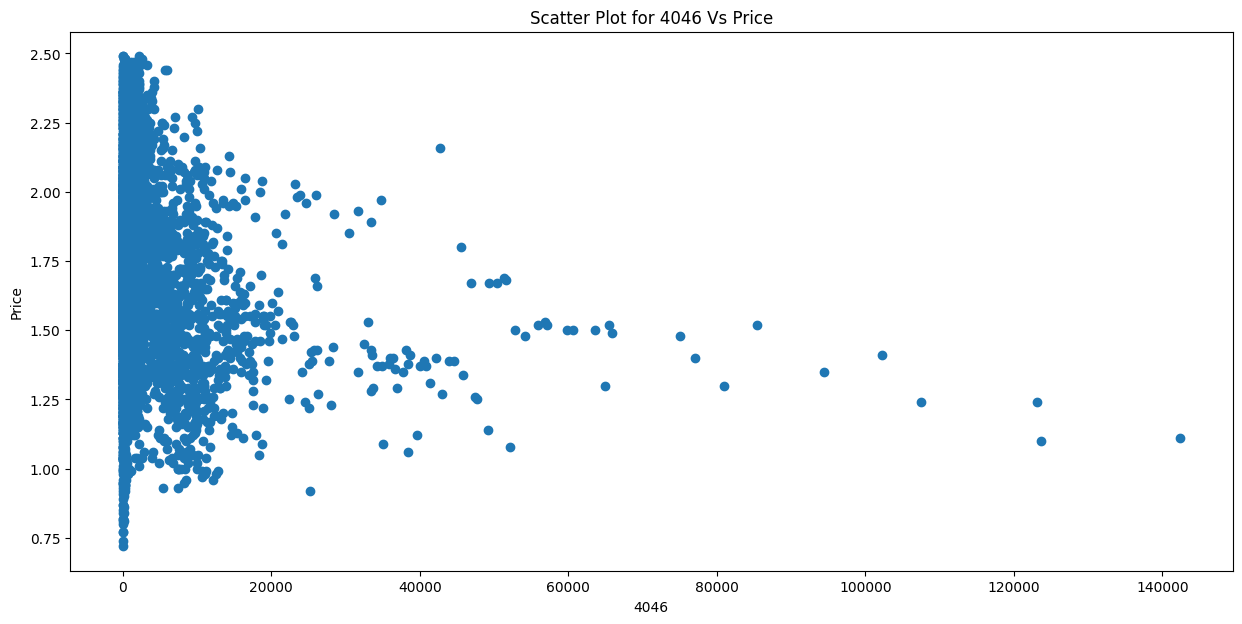

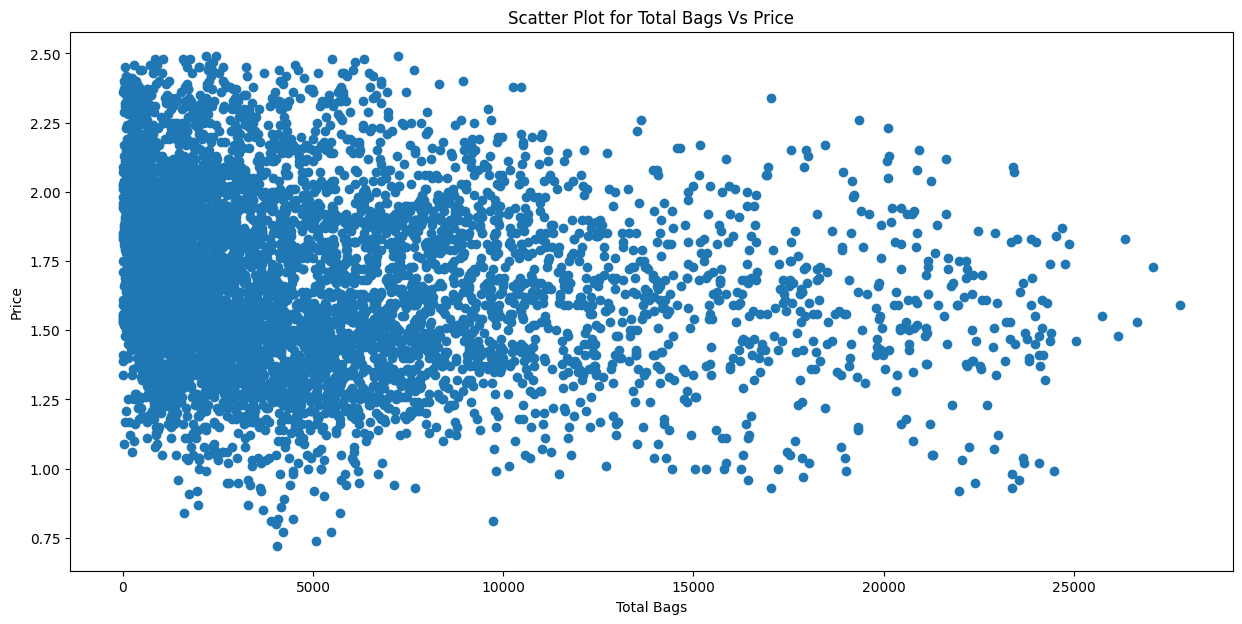

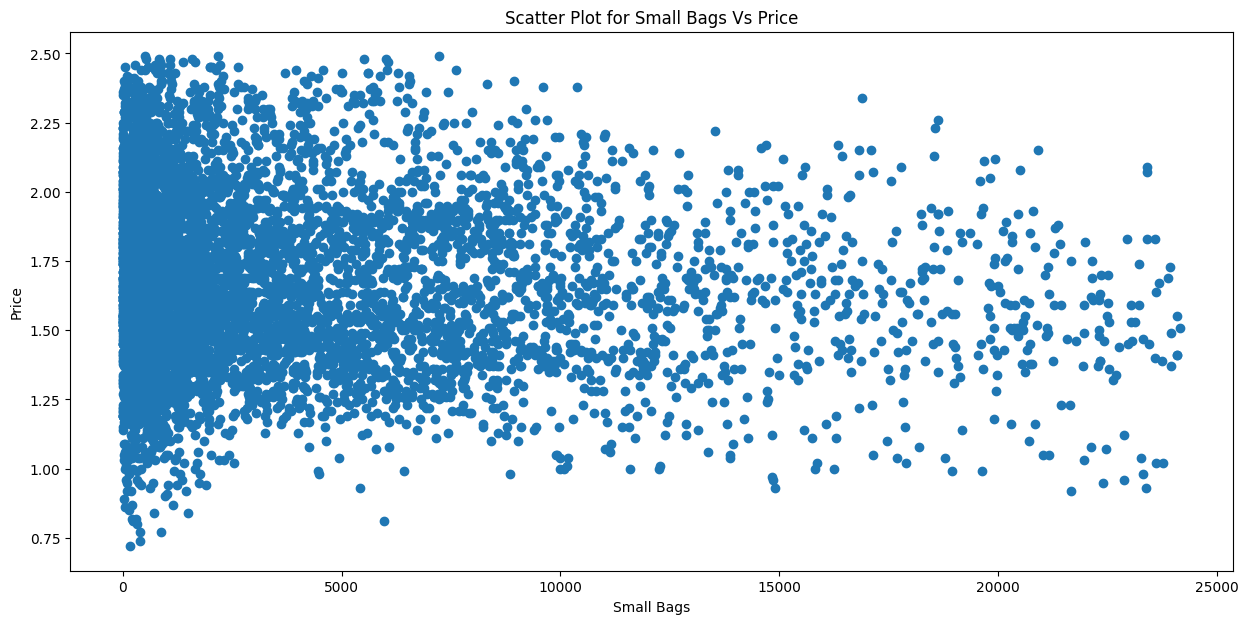

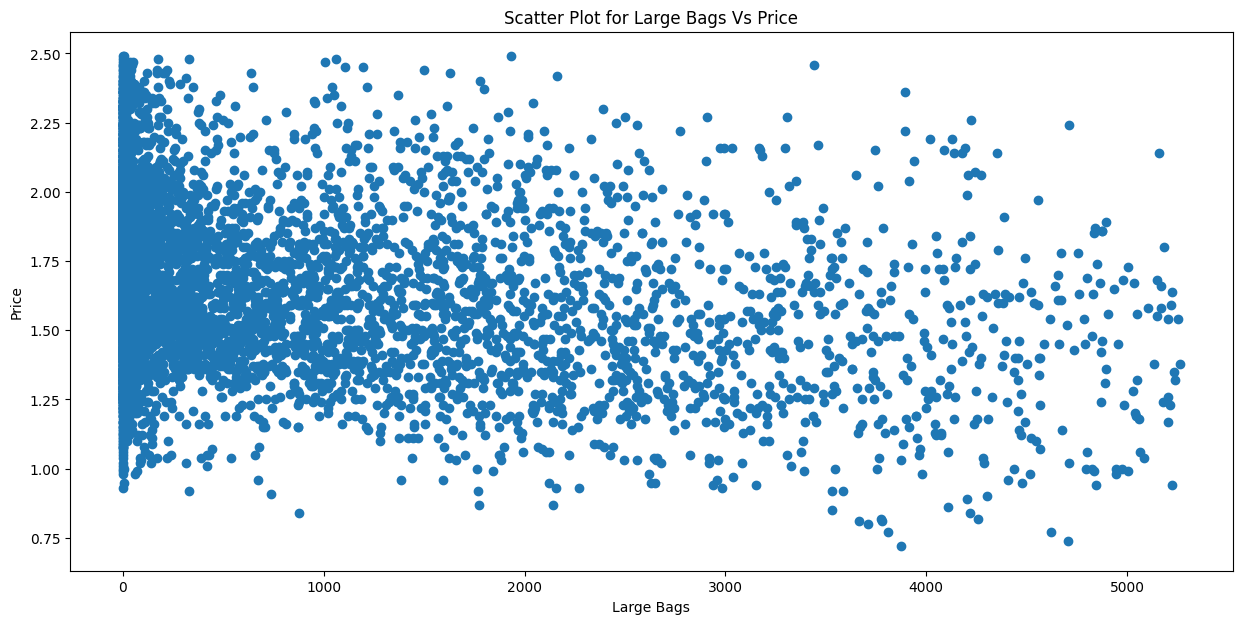

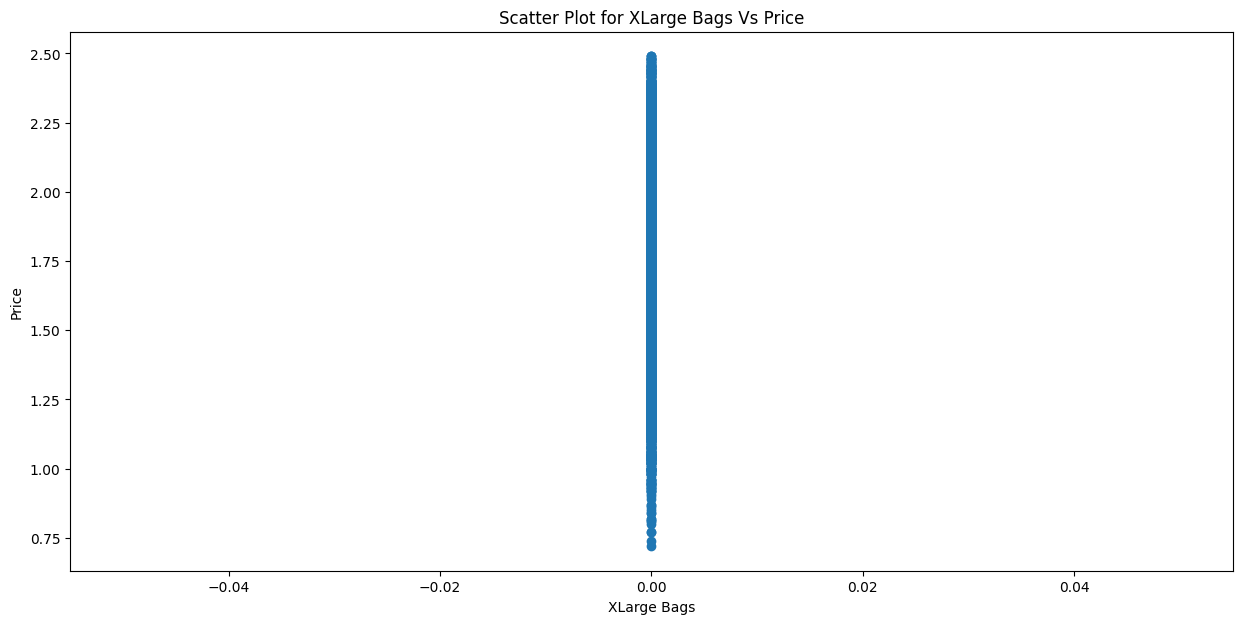

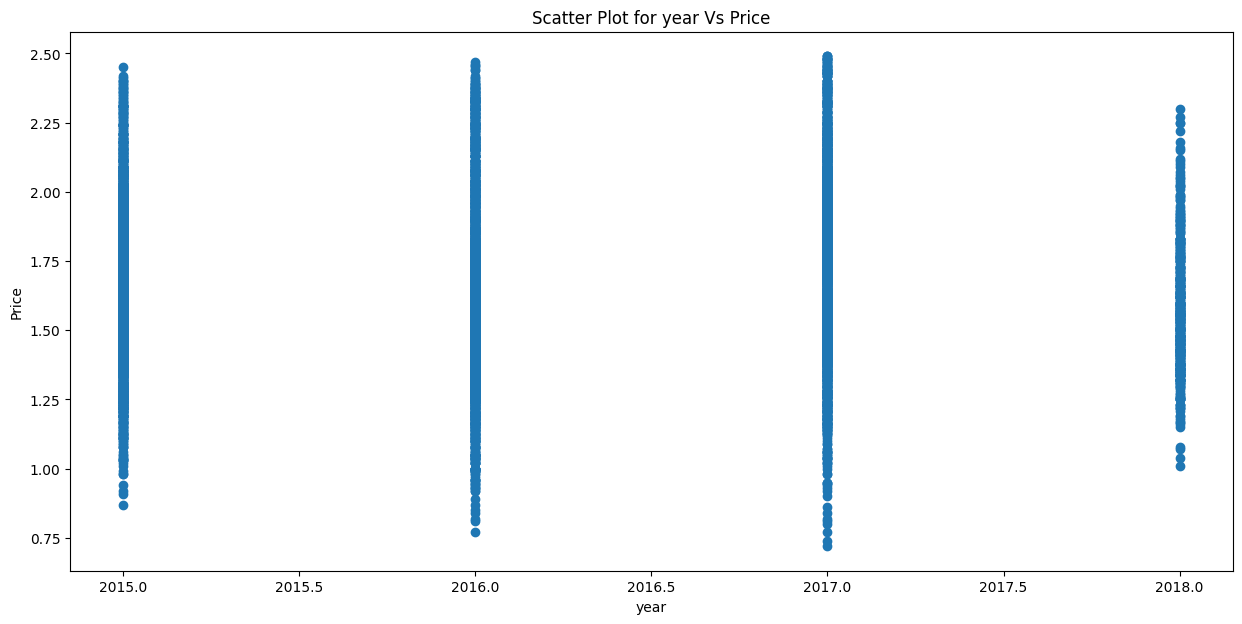

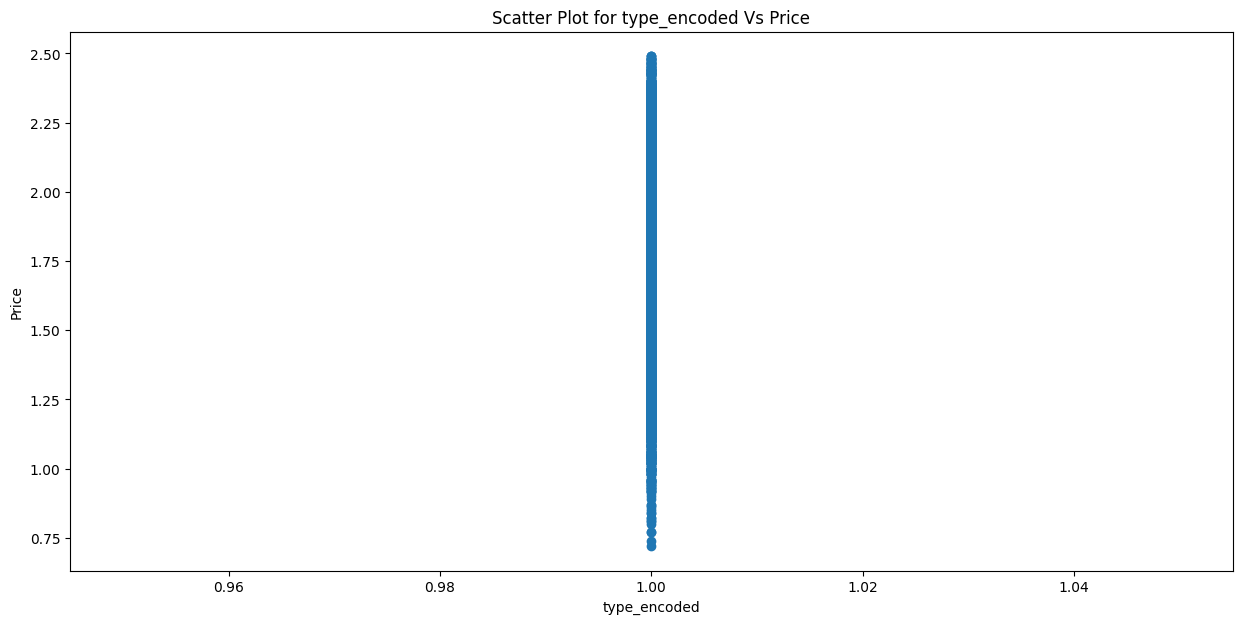

In [150]:
# Assuming you have obtained positive and negative indices correctly
# Iterate over positive indices and plot scatter plots
for index in positive:
    col_name = columns[index]  # Get column name using index
    plt.figure(figsize=(15, 7))
    plt.scatter(datasetreader[col_name], datasetreader['AveragePrice'])
    plt.xlabel(f'{col_name}')
    plt.ylabel('Price')
    plt.title(f'Scatter Plot for {col_name} Vs Price')
    plt.show()

# Iterate over negative indices and plot scatter plots
for index in negative:
    col_name = columns[index]  # Get column name using index
    plt.figure(figsize=(15, 7))
    plt.scatter(datasetreader[col_name], datasetreader['AveragePrice'])
    plt.xlabel(f'{col_name}')
    plt.ylabel('Price')
    plt.title(f'Scatter Plot for {col_name} Vs Price')
    plt.show()


# Fitting the Linear Regression Model

In [151]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

# R-Squared Score

In [152]:
y_pred = regressor.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R^2 score before feature selection: ", round(r2 * 100, 2), "%")

R^2 score before feature selection:  13.83 %


# Stats Model Summary

In [153]:
import statsmodels.api as sm

# Add a constant term to the independent variables matrix
X_with_const = sm.add_constant(X)

# Fit the OLS model
ols_model = sm.OLS(y, X_with_const).fit()

# Print the summary of the OLS regression model
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:           AveragePrice   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     94.71
Date:                Tue, 19 Mar 2024   Prob (F-statistic):           5.33e-60
Time:                        20:44:08   Log-Likelihood:                -1391.7
No. Observations:                6550   AIC:                             2791.
Df Residuals:                    6546   BIC:                             2819.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Date          1.141e-18   2.52e-21    453.015   

# Improving the score by feature selection - drop the negatively correlated ones is greater than negative mean and vice versa for positively correlated features

In [154]:
columns_to_drop = ['AveragePrice']

negative_total = float(0.0)
positive_total = float(0.0)
neg_count = 0
pos_count = 0

for i in correlation_scores:
  if i < 0.0:
    negative_total = negative_total + i
    neg_count += 1
  else:
    positive_total = positive_total + i
    pos_count += 1

for i in range(0, len(correlation_scores)):
  if correlation_scores[i] < 0.0:
    if correlation_scores[i] >= (negative_total/neg_count):
      columns_to_drop.append(columns[i])
  else:
    if correlation_scores[i] <= (positive_total/pos_count):
      columns_to_drop.append(columns[i])

print("Columns that are to be dropped: ", columns_to_drop)

Columns that are to be dropped:  ['AveragePrice', 'Total Volume', 'Small Bags', 'year']


In [155]:
X = datasetreader.drop(columns=columns_to_drop)
y = datasetreader['AveragePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [156]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [157]:
y_pred = regressor.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R^2 score after feature selection: ", round(r2 * 100, 2), "%")

R^2 score after feature selection:  13.84 %
